In [1]:
#Import the important things
%matplotlib inline
import wirc_drp.wirc_object as wo
from wirc_drp.utils import calibration
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii as asci
import os

new_calib=0
if new_calib==1:
    ### Get the file list
    dir='transit/'
    dark_for_flat_list = (asci.read('dark10s.txt', format = 'fast_no_header'))['col1'] #Read in the list
    science_dark_list = (asci.read('dark2_5s.txt', format = 'fast_no_header'))['col1'] #Read in the list
    twilight_flat_list = (asci.read('twilight_flat.txt', format = 'fast_no_header'))['col1']
    #twilight flats have 15 s exposure time, only darks available were 10 s exposures

    dark_for_flat_list=[dir+i for i in dark_for_flat_list]
    science_dark_list=[dir+i for i in science_dark_list]
    twilight_flat_list=[dir+i for i in twilight_flat_list]

    ### Create the master dark and a bad pixel map.
    ### This function creates a new fits file based on the last filename in your dark_list and appends "_master_dark.fits"
    ### The hot pixel map will be the same, except with a "_bp_map.fits" suffix. 
    dark_for_flat, bp_name = calibration.masterDark(dark_for_flat_list) # The output of this function is a the filename 
                                                             # of the master dark and bad pixel maps

    science_dark, bp_name = calibration.masterDark(science_dark_list) # The output of this function is a the filename 
                                                             # of the master dark and bad pixel maps  
        
    ## This function creates a new fits file based on the last filename in your flat list and appends "_master_flat.fits"
    flat_name, bp_name = calibration.masterFlat(twilight_flat_list, dark_for_flat, hotp_map_fname = None) 

In [2]:
#First we'll set up all the directories and filenames: 
wircpol_dir = os.environ['WIRC_DRP'] # Your WIRCPOL_DRP directory (with a "/" at the end!)
transit_dir = "transit/"

#raw_fn =transit_dir+"wirc0304.fits"
#flat_fn = transit_dir+"wirc0121_master_flat.fits"
#dark_fn = transit_dir+"wirc1080_master_dark.fits"
#bp_fn = transit_dir+"wirc1080_bp_map.fits"

In [3]:
#Now we'll create the wirc_data object, passing in the filenames for the master dark, flat and bad pixel maps
#raw_data = wo.wirc_data(raw_filename=raw_fn, flat_fn = flat_fn, dark_fn = dark_fn, bp_fn = bp_fn)

In [4]:
#plt.figure(figsize=(8,8))
#plt.imshow(raw_data.full_image, vmin=0, vmax=5000)

In [5]:
#We can see (even in this zoomed out image) that there are a bunch of bad pixels. 
#Let's run the calibration step. It will subtract the dark, divide by the flat, and interpolate over the bad pixels.
#raw_data.calibrate(mask_bad_pixels=False)
#raw_data.save_wirc_object("calibrated_wircspec.fits")

In [6]:
#now repeat this for each of the science images
calib_all=0
if calib_all == 1:
    for i in range(767):
        n_img=i+304
        if n_img < 1000:
            imgname=transit_dir+'wirc0'+str(n_img)+'.fits'
            raw_data = wo.wirc_data(raw_filename=imgname, flat_fn = flat_fn, dark_fn = dark_fn, bp_fn = bp_fn)
            raw_data.calibrate(mask_bad_pixels=False)
            raw_data.save_wirc_object('transit/calibrated0'+np.str(n_img)+'.fits')
        else:
            imgname=transit_dir+'wirc'+str(n_img)+'.fits'
            raw_data = wo.wirc_data(raw_filename=imgname, flat_fn = flat_fn, dark_fn = dark_fn, bp_fn = bp_fn)
            raw_data.calibrate(mask_bad_pixels=False)
            raw_data.save_wirc_object('transit/calibrated'+np.str(n_img)+'.fits')

Loading a wirc_data object from file calibrated_wircspec.fits


/Users/hknutson/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


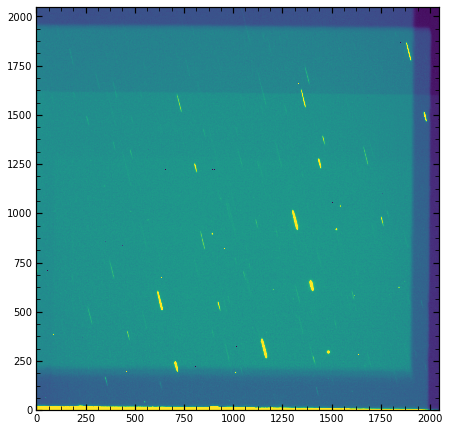

In [8]:
#First we'll create a new data object, mostly just to demonstrate how to read in an existing wirc_data object. 
#use this image as a test case for spectral extraction
calibrated_data = wo.wirc_data(wirc_object_filename="calibrated_wircspec.fits")
plt.figure(figsize=(8,8))
plt.imshow(calibrated_data.full_image, vmin=0, vmax=5000)

In [9]:
#positions of spectrum, WASP-74 is listed first
#all positions given in [y,x] pixel coordinates
order1_pos=np.array([[1397,631],[714,220],[1493,1251],[1973,1486]]) #approx radius is 28 pixels
order2_pos=np.array([[1313,963],[628,552],[1356,1576],[1890,1816],[1158,310]]) #approx radius is 50 pixels

order=2
if order==1:
    order_in=order1_pos
    cutout_size=40
if order==2:
    order_in=order2_pos
    cutout_size=60

for i in range(order_in.shape[0]):
    calibrated_data.source_list.append(wo.wircspec_source([order_in[i,1],order_in[i,0]],'slitless',
                                                         calibrated_data.n_sources+1))
    calibrated_data.n_sources += 1
    calibrated_data.source_list[i].get_cutouts(calibrated_data.full_image, calibrated_data.filter_name, True, cutout_size=cutout_size, flip=True)

/Users/hknutson/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


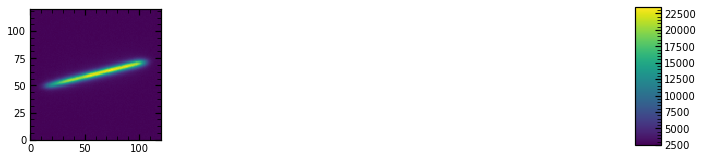

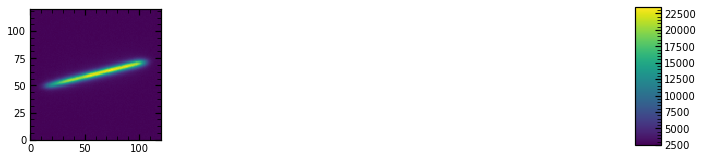

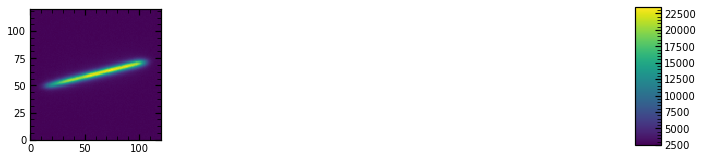

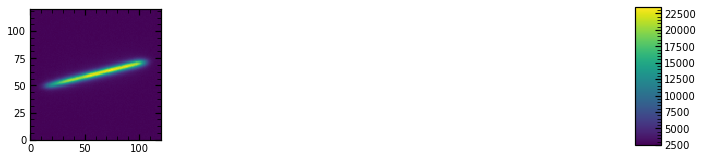

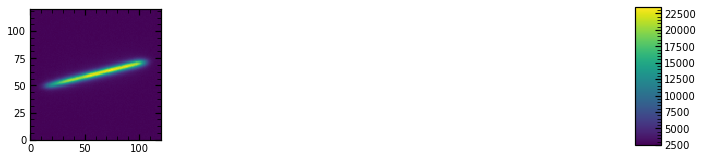

In [10]:
for i in range(calibrated_data.n_sources):
    calibrated_data.source_list[0].plot_cutouts(origin = 'lower')

In [11]:
for i in range(calibrated_data.n_sources):
    calibrated_data.source_list[i].extract_spectra(sub_background=True,plot=False,poly_order=1)

Performing Spectral Extraction for source 1
Extracting spectrum
Trace width 2.886539220506491
Performing Spectral Extraction for source 2
Extracting spectrum
Trace width 3.007651359756346
Performing Spectral Extraction for source 3
Extracting spectrum
Trace width 2.8132324668712694
Performing Spectral Extraction for source 4
Extracting spectrum
Trace width 2.7510004872728135
Performing Spectral Extraction for source 5
Extracting spectrum
Trace width 3.1802081301439067


/Users/hknutson/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/hknutson/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


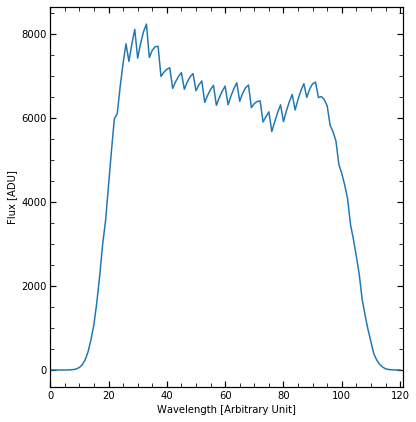

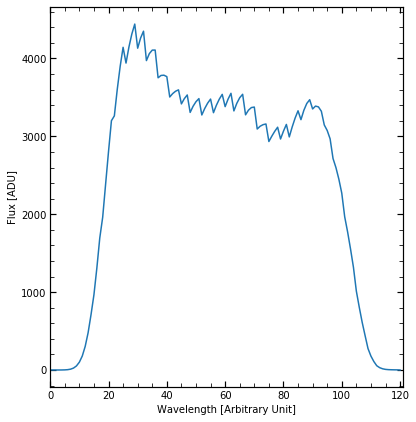

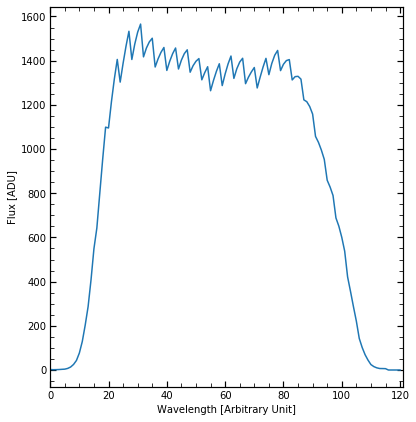

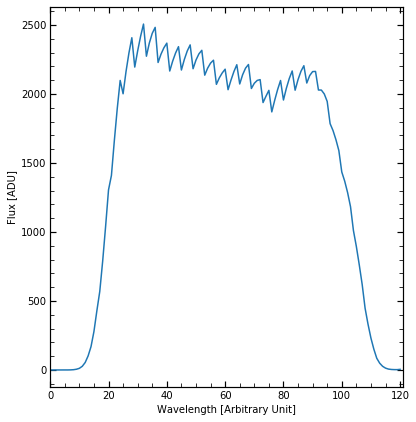

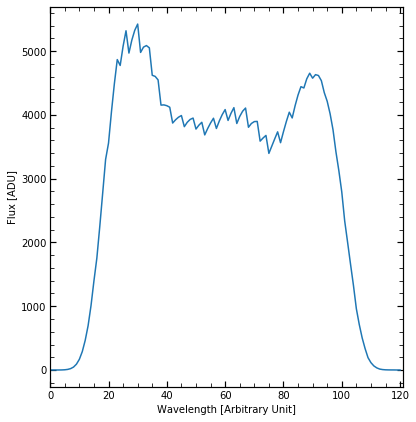

In [12]:
#And we'll plot the data!
for i in range(calibrated_data.n_sources):
    calibrated_data.source_list[i].plot_trace_spectra()